In [1]:
#set dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stats


In [2]:
#import values and crime data
values_file = os.path.join("../Resources/2019_Hill_Prop_Value.csv")
crime_file = os.path.join("../Resources/combined_crime_data.csv")

value_df = pd.read_csv(values_file,dtype={'NBRHD_CD':'str'} )
crime_df = pd.read_csv(crime_file, dtype={'NBRHD_CD':'str'})

value_df.head()
crime_df.head()

,Unnamed: 0,Unnamed: 0.1,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip,year,BlockAddress,NBRHD_CD
0,221,324,2/9/2016,2016-94027,BURGLARY,BURGLARY RESIDENCE / FORCED,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300
1,550,807,4/5/2016,2016-232057,DRUGS,DRUGS/NARCOTICS,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300
2,551,808,4/5/2016,2016-232057,DRUGS,DRUG PARAPHERNALIA,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300
3,755,1091,5/7/2016,2016-311881,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300
4,1836,2540,10/18/2016,2016-728782,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300


In [3]:
#drop any null values from crime_df
crime1_df = crime_df.dropna()
crime1_df.head()


,Unnamed: 0,Unnamed: 0.1,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip,year,BlockAddress,NBRHD_CD
0,221,324,2/9/2016,2016-94027,BURGLARY,BURGLARY RESIDENCE / FORCED,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300
1,550,807,4/5/2016,2016-232057,DRUGS,DRUGS/NARCOTICS,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300
2,551,808,4/5/2016,2016-232057,DRUGS,DRUG PARAPHERNALIA,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300
3,755,1091,5/7/2016,2016-311881,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300
4,1836,2540,10/18/2016,2016-728782,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST,61400300


In [4]:
#merge both sheets based on NBRHD_CD
merged_df = value_df.merge(crime1_df, on = 'NBRHD_CD')
merged_df.head()


,Unnamed: 0_x,SEQ_NO,PARCEL_ID,PropertyValue,BlockAddress_x,NBRHD_CD,CENSUS_BK,PropAddress,City,ZipCode,...,Unnamed: 0_y,Unnamed: 0.1,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip,year,BlockAddress_y
0,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,221,324,2/9/2016,2016-94027,BURGLARY,BURGLARY RESIDENCE / FORCED,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
1,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,550,807,4/5/2016,2016-232057,DRUGS,DRUGS/NARCOTICS,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
2,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,551,808,4/5/2016,2016-232057,DRUGS,DRUG PARAPHERNALIA,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
3,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,755,1091,5/7/2016,2016-311881,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
4,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,1836,2540,10/18/2016,2016-728782,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST


In [5]:
# create new dataframe grouped by neighborhood code
group_nbrhd_df = merged_df.groupby('NBRHD_CD')
group_nbrhd_df.head()

,Unnamed: 0_x,SEQ_NO,PARCEL_ID,PropertyValue,BlockAddress_x,NBRHD_CD,CENSUS_BK,PropAddress,City,ZipCode,...,Unnamed: 0_y,Unnamed: 0.1,Reported Date,Case Number,Crime Type,Crime Type Extension,Address,zip,year,BlockAddress_y
0,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,221,324,2/9/2016,2016-94027,BURGLARY,BURGLARY RESIDENCE / FORCED,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
1,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,550,807,4/5/2016,2016-232057,DRUGS,DRUGS/NARCOTICS,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
2,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,551,808,4/5/2016,2016-232057,DRUGS,DRUG PARAPHERNALIA,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
3,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,755,1091,5/7/2016,2016-311881,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
4,71947,72449,1828010T7000000000290U,118638,12TH ST,61400300,120570000000,14202 12TH ST,TAMPA,33613,...,1836,2540,10/18/2016,2016-728782,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,14200 BLOCK 12TH ST N,33613,2016,N 12TH ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034516,71296,71792,1828010SS000001000010U,53585,REUTER STRASSE CIR,81401200,120570000000,14418 REUTER STRASSE CIR 101,TAMPA,33613,...,497,732,3/28/2016,2016-210950,BURGLARY,THEFT FROM A VEHICLE,14400 BLOCK REUTER STRASSE CR,33613,2016,REUTER STRASSE CIR
1034517,71296,71792,1828010SS000001000010U,53585,REUTER STRASSE CIR,81401200,120570000000,14418 REUTER STRASSE CIR 101,TAMPA,33613,...,526,783,4/2/2016,2016-223477,BURGLARY,THEFT FROM A VEHICLE,14400 BLOCK REUTER STRASSE CR,33613,2016,REUTER STRASSE CIR
1034518,71296,71792,1828010SS000001000010U,53585,REUTER STRASSE CIR,81401200,120570000000,14418 REUTER STRASSE CIR 101,TAMPA,33613,...,610,885,4/13/2016,2016-252297,BURGLARY,THEFT FROM A VEHICLE,14400 BLOCK REUTER STRASSE CR,33613,2016,REUTER STRASSE CIR
1034519,71296,71792,1828010SS000001000010U,53585,REUTER STRASSE CIR,81401200,120570000000,14418 REUTER STRASSE CIR 101,TAMPA,33613,...,614,893,4/13/2016,2016-252352,THEFT,PETIT THEFT - ALL OTHER,14400 BLOCK REUTER STRASSE CR,33613,2016,REUTER STRASSE CIR


In [6]:
# run calculations calculate average home value and crime counts by neigborhood code

#avg home value by neighborhood code
avg_value = group_nbrhd_df.median()['PropertyValue']
#count of crimes by neighborhood code
total_crime = group_nbrhd_df.count()['Case Number']



#create data frame 
crime_value_plot_df = pd.DataFrame({"Avg Prop Value($)": avg_value,
                                "Crime Count": total_crime})
crime_value_plot_df.head()


,Avg Prop Value($),Crime Count
NBRHD_CD,,
21001400,271692.0,16276
21100100,219997.0,17958
21100200,267101.0,14080
21100300,191519.0,1530
21100600,251568.0,60705


In [7]:
#crime_value_plot_33613.count()
# drop neighborcodes with avg prop values greater than 1.5 mil
crime_value_plot_df = crime_value_plot_df.drop(['21101100','21500500','51300100','51500100','51400100',
                                                      '71100100','71400100'])
crime_value_plot_df.head()



,Avg Prop Value($),Crime Count
NBRHD_CD,,
21001400,271692.0,16276
21100100,219997.0,17958
21100200,267101.0,14080
21100300,191519.0,1530
21100600,251568.0,60705


In [8]:
crime_value_plot_df.count()

Avg Prop Value($)    29
Crime Count          29
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

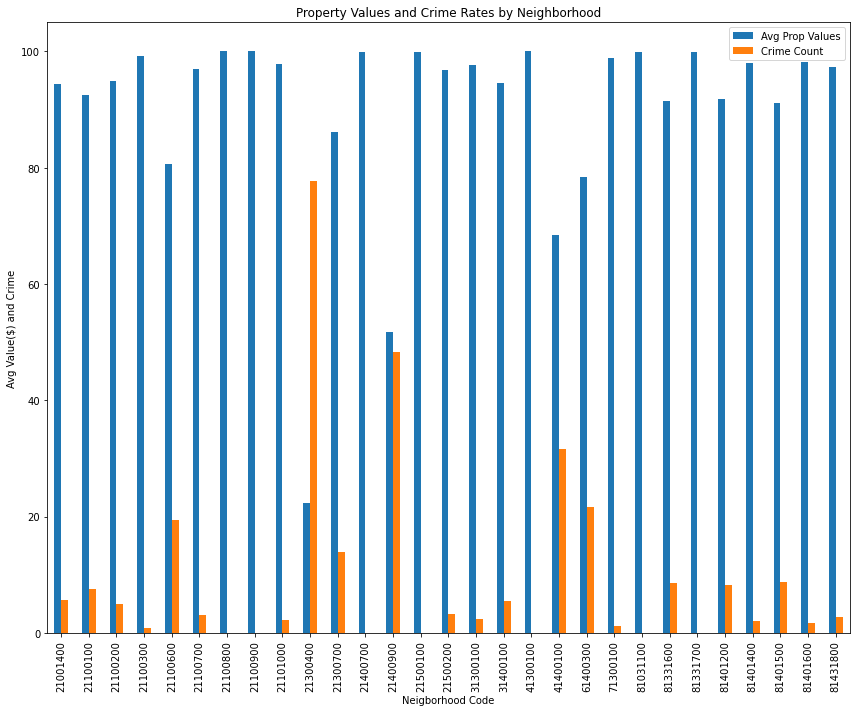

In [9]:
# create bar graph for zip code 33616
crime_value_plot_df.apply(lambda x: x*100/sum(x), axis=1).plot.bar(figsize = (12,10))
plt.title('Property Values and Crime Rates by Neighborhood')
plt.ylabel("Avg Value($) and Crime")
plt.xlabel("Neigborhood Code")
plt.legend(labels=["Avg Prop Values","Crime Count"],loc="best")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

In [10]:
#test to see if there is a corelation between crime count and property value
group1 = value_df["PropertyValue"]
group2 = crime_df["Unnamed: 0"]
print(group1.mean(),group2.count())
stats.ttest_ind(group1, group2, equal_var=False)

365645.07440536696 11370


Ttest_indResult(statistic=11.08960504538704, pvalue=3.0388049428633537e-28)